In [1]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dados = pd.read_csv(uri)

In [3]:
mapa = {
    "expected_hours" : "horas_esperadas",
    "price" : "preco",
    "unfinished": "nao_finalizado"
}

dados = dados.rename(columns = mapa)

In [4]:
troca = {
    0:1,
    1:0
}

dados["finalizado"] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


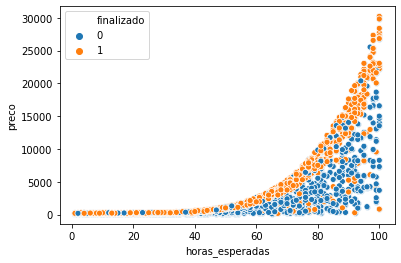

In [5]:
import seaborn as sns

sns.scatterplot(x = "horas_esperadas", y = "preco", data=dados)
sns.scatterplot(x = "horas_esperadas", y = "preco", hue = "finalizado", data=dados)

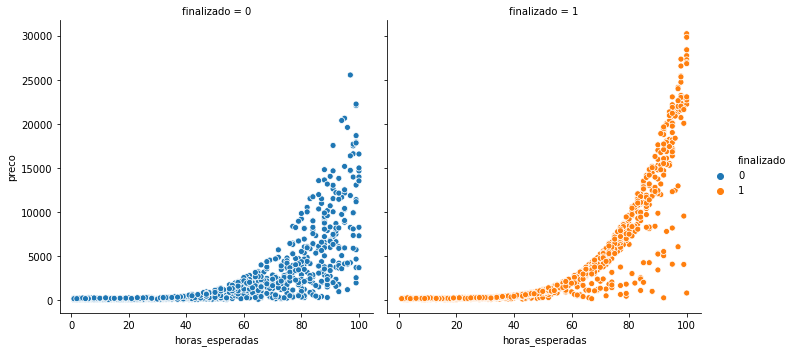

In [6]:
sns.relplot(x = "horas_esperadas", y = "preco",hue = "finalizado", col = "finalizado", data=dados)

In [7]:
x = dados[["horas_esperadas", "preco"]]
y = dados[["finalizado"]]

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

#teste do modelo
previsao = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsao) * 100
print("A acurácia do modelo foi de %.2f%%" % acuracia)


A acurácia do modelo foi de 47.41%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia_base = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi de %.2f%%" % acuracia_base)


A acurácia do algoritmo de baseline foi de 52.59%
